# Example: MNIST Data Set -  Convolution Model

## Prepare Notebook

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

## Load + Prepare Data

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.array(x_train, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)

In [3]:
x_train.shape

(60000, 28, 28)

In [31]:
np.transpose(a=x_train, axes=(1,2,0)).shape

(28, 28, 60000)

In [4]:
# Construct the dataset from numpy arrays
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [5]:
train_dataset.map(lambda x, y: x )

<MapDataset shapes: (28, 28), types: tf.float32>

In [6]:
train_dataset.map(lambda x, y: y )

<MapDataset shapes: (), types: tf.uint8>

In [7]:
train_dataset.map(lambda x, y: (tf.expand_dims(input=x, axis=-1), y))

<MapDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.uint8)>

In [8]:
# Add channel dimension
train_dataset = train_dataset.map(lambda x, y: (tf.expand_dims(x, -1), y))
test_dataset= test_dataset.map(lambda x, y: (tf.expand_dims(x, -1), y))

In [9]:
# which on direct numpy data would be
x_train2 = x_train[..., np.newaxis]
x_test2 = x_test[..., np.newaxis]

In [10]:
# Batch data
batch_size = 128
train_dataset = train_dataset.shuffle(len(x_train)).batch(batch_size)
test_dataset= test_dataset.batch(batch_size)

## Define Model

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2769024   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


In [12]:
28 - 3 + 1

26

In [13]:
26*26*32

21632

Label tf.Tensor([1], shape=(1,), dtype=uint8)


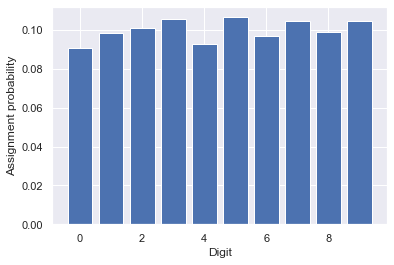

In [14]:
image, label = next(train_dataset.__iter__())
prediction = model.apply(image[0:1])
plt.bar(range(0,10), prediction[0])
plt.xlabel("Digit")
plt.ylabel("Assignment probability")
print("Label", label[0:1])

## Train Model 

In [15]:
model_history = model.fit(
    train_dataset,
    epochs=10, 
    validation_data=(x_test2, y_test)
)

Epoch 1/10


W0825 13:21:50.481843 4441613760 deprecation.py:323] From /Users/juanitorduz/anaconda3/envs/bms_summer19/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


469/469 [==============================] - 13s 27ms/step - loss: 0.1661 - accuracy: 0.9511 - val_loss: 0.0633 - val_accuracy: 0.9791
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0508 - accuracy: 0.9847 - val_loss: 0.0513 - val_accuracy: 0.9830
Epoch 3/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0275 - accuracy: 0.9923 - val_loss: 0.0491 - val_accuracy: 0.9835
Epoch 4/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0159 - accuracy: 0.9959 - val_loss: 0.0482 - val_accuracy: 0.9852
Epoch 5/10
469/469 [==============================] - 12s 27ms/step - loss: 0.0102 - accuracy: 0.9972 - val_loss: 0.0560 - val_accuracy: 0.9831
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0065 - accuracy: 0.9985 - val_loss: 0.0574 - val_accuracy: 0.9841
Epoch 7/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0.0629 - val_accuracy: 0.9843
Epo

## Model Evaluation

In [16]:
# Store history in a data frame. 
hist_df = pd.DataFrame(model_history.history)
hist_df['epoch'] = model_history.epoch

hist_df.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.166129,0.951083,0.063296,0.9791,0
1,0.050772,0.984700,0.051346,0.9830,1
2,0.027541,0.992267,0.049062,0.9835,2
3,0.015877,0.995883,0.048194,0.9852,3
4,0.010208,0.997217,0.055985,0.9831,4


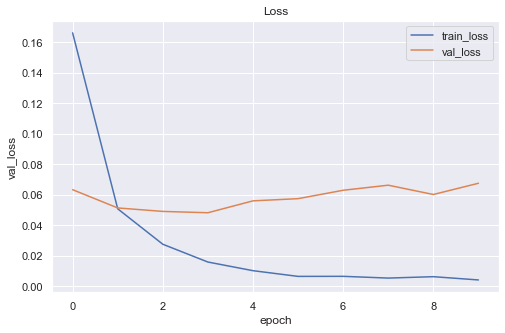

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(x='epoch', y='loss', data=hist_df, ax=ax, label='train_loss')
sns.lineplot(x='epoch', y='val_loss', data=hist_df, ax=ax, label='val_loss')
ax.set(title='Loss')
ax.legend(loc='upper right');

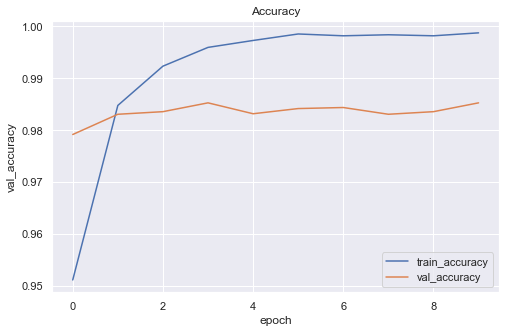

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(x='epoch', y='accuracy', data=hist_df, ax=ax, label='train_accuracy')
sns.lineplot(x='epoch', y='val_accuracy', data=hist_df, ax=ax, label='val_accuracy')
ax.set(title='Accuracy')
ax.legend(loc='lower right');

In [19]:
model.evaluate(x_test2, y_test)

10000/10000 [==============================] - 1s 81us/sample - loss: 0.0681 - accuracy: 0.9852


[0.06806250286385548, 0.9852]

In [20]:
y_pred = model.apply(x_test2)

In [21]:
y_pred_classes = tf.argmax(y_pred, axis=1)

Let us see where the model did not predcut the right class:

In [22]:
pred_diff = y_test - y_pred_classes.numpy()

In [23]:
indices = np.where(np.not_equal(pred_diff, 0))
indices = indices[0]

In [24]:
def get_miss_prediction(y_test, x_test, y_pred_classes, indices, i):
    
    true_label = y_test[indices[i]]
    
    pred_label = y_pred_classes.numpy()[indices[i]]
    
    y_pred_classes.numpy()[indices[i]]
    
    fig, ax = plt.subplots(figsize=(8, 6))

    sns.heatmap(data=x_test[indices[i]], cmap='gist_gray', ax=ax)
    ax.set(title=f'True Label = {true_label} & Pred Label = {pred_label}');

### Examples

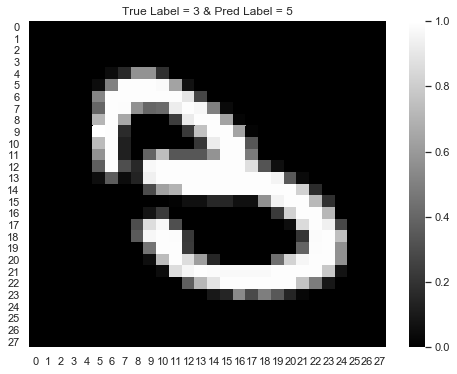

In [25]:
get_miss_prediction(y_test, x_test, y_pred_classes, indices, 0)

- Example 2

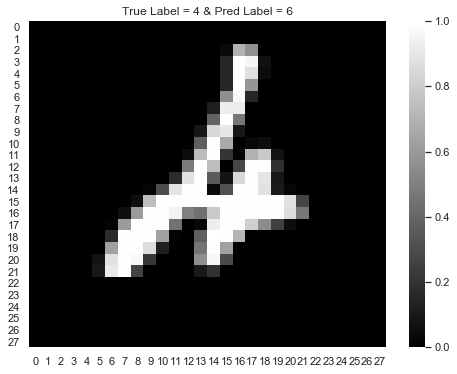

In [26]:
get_miss_prediction(y_test, x_test, y_pred_classes, indices, 3)

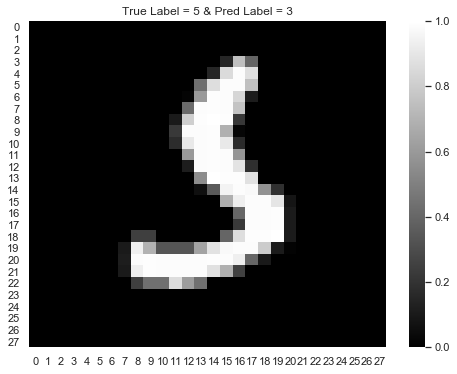

In [27]:
get_miss_prediction(y_test, x_test, y_pred_classes, indices, 5)